# MNIST RNN LSTM

In this tutorial, we will use RNN to process No sequential data  
The original tutorial is from  https://github.com/MorvanZhou/Tensorflow-Tutorial/blob/master/tutorial-contents/402_RNN_classification.py


In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import os 
os.environ['CUDA_VISIBLE_DEVICES'] = "1"

tf.set_random_seed(1)   # set random seed
np.random.seed(1)

## Step 1: Download the data.

### Hyper Parameters
Here we set hypermeters, TIME_STEP is image height, and INPUT_SIZE is image width  

In [2]:
BATCH_SIZE = 64
TIME_STEP = 28    # RNN time step / image height
INPUT_SIZE = 28   # RNN input step / image width
LR = 0.01         # Learning rate

## Input data


In [3]:
mnist = input_data.read_data_sets('./MNIST_data', one_hot=True)
test_x = mnist.test.images
test_y = mnist.test.labels

Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz


### Plot one example

(55000, 784)
(55000, 10)


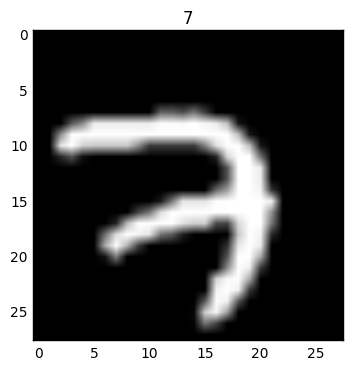

In [4]:
print mnist.train.images.shape
print mnist.train.labels.shape
plt.imshow(mnist.train.images[0].reshape((28,28)),cmap='gray')
plt.title('%i' % np.argmax(mnist.train.labels[0]))
plt.show()

## Step 2: Create Graph

In [5]:
# x y placeholder
x = tf.placeholder(tf.float32, [None, TIME_STEP*INPUT_SIZE]) # input x
y = tf.placeholder(tf.float32, [None, 10])   # input labels
image = tf.reshape(x,[-1, TIME_STEP,INPUT_SIZE]) # (batch, height, width, channel)

Call a LSTM cell that processes one line of image at a time, hidden units are 64 

In [6]:
rnn_cell = tf.contrib.rnn.BasicLSTMCell(num_units=64)

Create a recurrent neural network specified by RNNCell.

In [7]:
rnn, (h_c, h_n) = tf.nn.dynamic_rnn(
            rnn_cell,       # cell function
            image,          # input images
            initial_state = None,   # the initial hidden state
            dtype = tf.float32,     # must given if initial_state = None
            time_major = False,     # False :(batch, time step, input) 
                                    # True : (time step, batch ,input) 
            )

Create a densely-connected layer to get output

In [8]:
output = tf.layers.dense(rnn[:,-1,:],10) 

loss function and Optimizer

In [9]:
loss = tf.losses.softmax_cross_entropy(onehot_labels= y,logits=output)
train_op = tf.train.AdadeltaOptimizer(LR).minimize(loss)

In [10]:
accuracy = tf.metrics.accuracy(          # return (acc, update_op), and create 2 local variables
    labels=tf.argmax(y, axis=1), predictions=tf.argmax(output, axis=1),)[1]

sess = tf.Session()
init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer()) # the local var is for accuracy_op
sess.run(init_op)     # initialize var in graph

for step in range(100000):    # training
    b_x, b_y = mnist.train.next_batch(BATCH_SIZE)
    _, loss_ = sess.run([train_op, loss], {x: b_x/255., y: b_y})
    if step % 5000== 0:      # testing
        #accuracy_train = sess.run(accuracy, {x: b_x, y: b_y})
        accuracy_test = sess.run(accuracy, {x: test_x/255., y: test_y})
        print('train loss: %.4f' % loss_, '| test accuracy: %.2f' % accuracy_test)

('train loss: 2.3026', '| test accuracy: 0.10')
('train loss: 2.3001', '| test accuracy: 0.11')
('train loss: 2.2994', '| test accuracy: 0.11')
('train loss: 2.3032', '| test accuracy: 0.11')
('train loss: 2.3095', '| test accuracy: 0.11')
('train loss: 2.2857', '| test accuracy: 0.11')
('train loss: 2.2904', '| test accuracy: 0.11')
('train loss: 2.3041', '| test accuracy: 0.11')
('train loss: 2.3010', '| test accuracy: 0.11')
('train loss: 2.2983', '| test accuracy: 0.11')
('train loss: 2.3094', '| test accuracy: 0.11')
('train loss: 2.3028', '| test accuracy: 0.11')
('train loss: 2.3125', '| test accuracy: 0.11')
('train loss: 2.3124', '| test accuracy: 0.11')
('train loss: 2.3093', '| test accuracy: 0.11')
('train loss: 2.3032', '| test accuracy: 0.11')
('train loss: 2.2920', '| test accuracy: 0.11')
('train loss: 2.2961', '| test accuracy: 0.11')
('train loss: 2.2832', '| test accuracy: 0.11')
('train loss: 2.0910', '| test accuracy: 0.12')


In [11]:
# print 10 predictions from test data
test_output = sess.run(output, {x: test_x[:10]})
pred_y = np.argmax(test_output, 1)
print(pred_y, 'prediction number')
print(np.argmax(test_y[:10], 1), 'real number')

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'prediction number')
(array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]), 'real number')
